In [1]:
import pandas as pd       # for reading & working with data
import numpy as np        # for numerical operations
import matplotlib.pyplot as plt       # for plotting graphs
import seaborn as sns                 # for advanced plots


Matplotlib is building the font cache; this may take a moment.


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler   # encoding + scaling
from sklearn.model_selection import train_test_split             # splitting data


In [3]:
from sklearn.linear_model import LinearRegression                # Model 1: Linear Regression
from sklearn.ensemble import RandomForestRegressor               # Model 2: Random Forest
from sklearn.svm import SVR                                      # Model 3: Support Vector Regression


In [4]:
from sklearn.metrics import mean_squared_error, r2_score         # for regression evaluation
from sklearn.metrics import confusion_matrix                     # optional: if you binarize price


In [6]:
!pip install shap


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.3/992.3 kB 16.4 MB/s eta 0:00:000:00:01


In [7]:
import shap     # for SHAP analysis (interpreting feature importance)


In [9]:
# Reload the dataset
df = pd.read_csv("Gurugram_House_Price_Dataset.csv")

df.head()

,Property_ID,Location,BHK,Bathrooms,Furnishing_Status,Super_Builtup_Area,Carpet_Area,Property_Type,Age_of_Property,Floor,Total_Floors,Parking,Power_Backup,Gated_Security,Nearby_Metro,Nearby_School,Nearby_Hospital,Price_in_Lakhs
0,PROP0001,Sector 45,2,2,Unfurnished,3389,2840,Studio,6,0,8,1,Yes,Yes,0.24,1.24,2.54,355
1,PROP0002,Sector 56,1,1,Unfurnished,1604,1346,Apartment,7,1,5,2,No,Yes,1.16,1.08,0.86,160
2,PROP0003,Palam Vihar,1,1,Fully-Furnished,803,562,Apartment,9,9,13,1,No,Yes,3.96,0.63,3.71,73
3,PROP0004,Sector 57,1,1,Semi-Furnished,1488,1250,Independent House,4,1,5,1,Yes,Yes,1.04,0.95,0.77,141
4,PROP0005,Sector 45,3,3,Semi-Furnished,2197,1616,Independent House,14,0,1,1,Yes,Yes,0.58,2.35,1.45,230


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy of the dataframe to preserve original
df_processed = df.copy()


In [11]:
# Drop the 'Property_ID' column
df_processed.drop('Property_ID', axis=1, inplace=True)

In [12]:
# Label Encode binary categorical columns (Yes/No)
binary_cols = ['Power_Backup', 'Gated_Security']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})

In [13]:
# Label Encode categorical columns with few categories
label_cols = ['Furnishing_Status', 'Property_Type']
label_encoder = LabelEncoder()
for col in label_cols:
    df_processed[col] = label_encoder.fit_transform(df_processed[col])

In [14]:
# One-hot encode 'Location' since it has 15 unique values
df_processed = pd.get_dummies(df_processed, columns=['Location'], drop_first=True)



In [15]:
# Feature scaling for continuous features
scale_cols = ['Super_Builtup_Area', 'Carpet_Area', 'Nearby_Metro', 'Nearby_School', 'Nearby_Hospital']
scaler = StandardScaler()
df_processed[scale_cols] = scaler.fit_transform(df_processed[scale_cols])


In [16]:
# Show the first few rows after preprocessing
df_processed.head()

,BHK,Bathrooms,Furnishing_Status,Super_Builtup_Area,Carpet_Area,Property_Type,Age_of_Property,Floor,Total_Floors,Parking,...,Location_New Gurgaon,Location_Palam Vihar,Location_Sector 45,Location_Sector 56,Location_Sector 57,Location_Sector 67,Location_Sohna Road,Location_South City 1,Location_South City 2,Location_Sushant Lok
0,2,2,2,1.621313,1.759863,3,6,0,8,1,...,False,False,True,False,False,False,False,False,False,False
1,1,1,2,-0.517017,-0.416388,0,7,1,5,2,...,False,False,False,True,False,False,False,False,False,False
2,1,1,0,-1.476570,-1.558409,0,9,9,13,1,...,False,True,False,False,False,False,False,False,False,False
3,1,1,1,-0.655979,-0.556227,2,4,1,5,1,...,False,False,False,False,True,False,False,False,False,False
4,3,3,1,0.193363,-0.023089,2,14,0,1,1,...,False,False,True,False,False,False,False,False,False,False


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Properties')

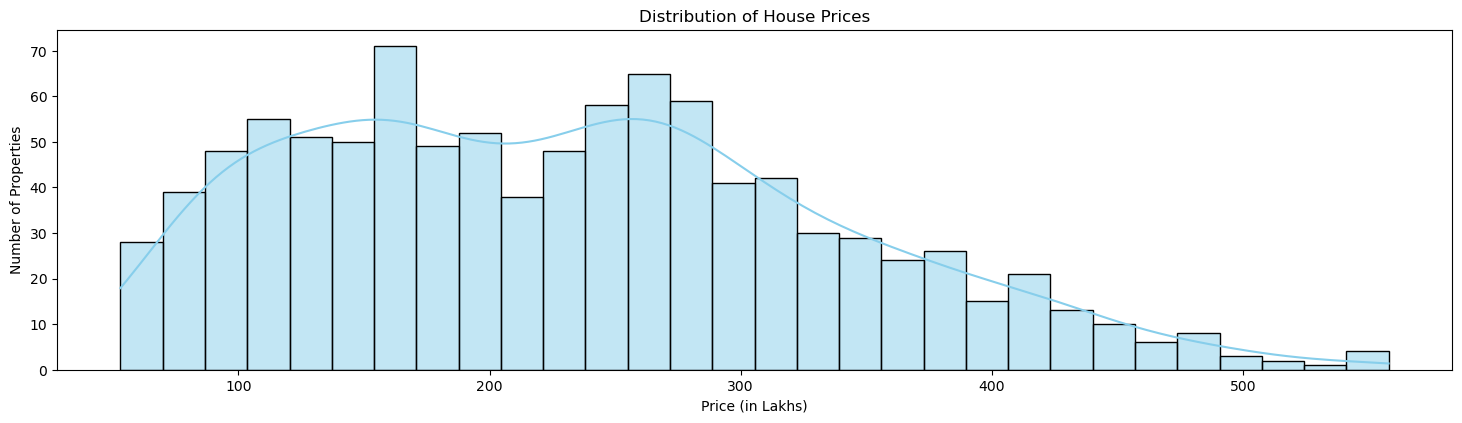

In [23]:
# Create EDA visualizations

plt.figure(figsize=(18, 15))

# Plot 1: Distribution of House Prices
plt.subplot(3, 1, 1)
sns.histplot(df['Price_in_Lakhs'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Number of Properties')

/tmp/ipykernel_195/2657513034.py:11: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


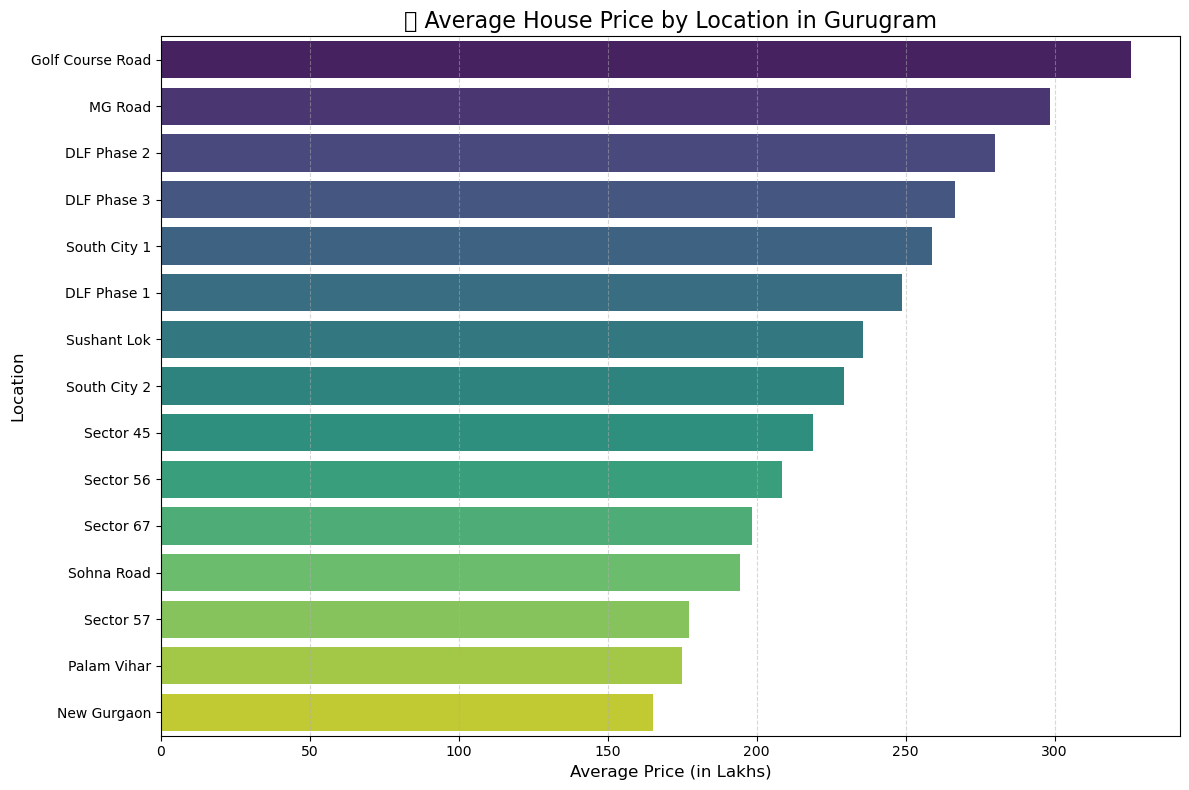

In [27]:
# Re-plotting Plot 2: Average Price per Location in bigger size

plt.figure(figsize=(12, 8))
avg_price_by_location = df.groupby('Location')['Price_in_Lakhs'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price_by_location.values, y=avg_price_by_location.index, palette='viridis')
plt.title('🏘️ Average House Price by Location in Gurugram', fontsize=16)
plt.xlabel('Average Price (in Lakhs)', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_195/3079108022.py:9: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


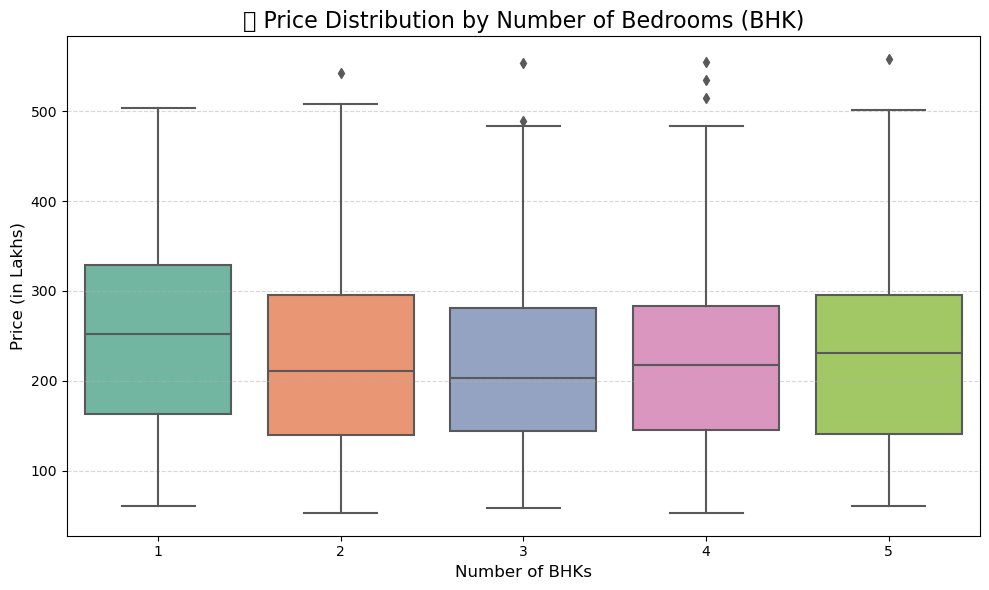

In [29]:
# Re-plotting Plot 3: Price vs BHK in bigger size

plt.figure(figsize=(10, 6))
sns.boxplot(x='BHK', y='Price_in_Lakhs', data=df, palette='Set2')
plt.title('🏠 Price Distribution by Number of Bedrooms (BHK)', fontsize=16)
plt.xlabel('Number of BHKs', fontsize=12)
plt.ylabel('Price (in Lakhs)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


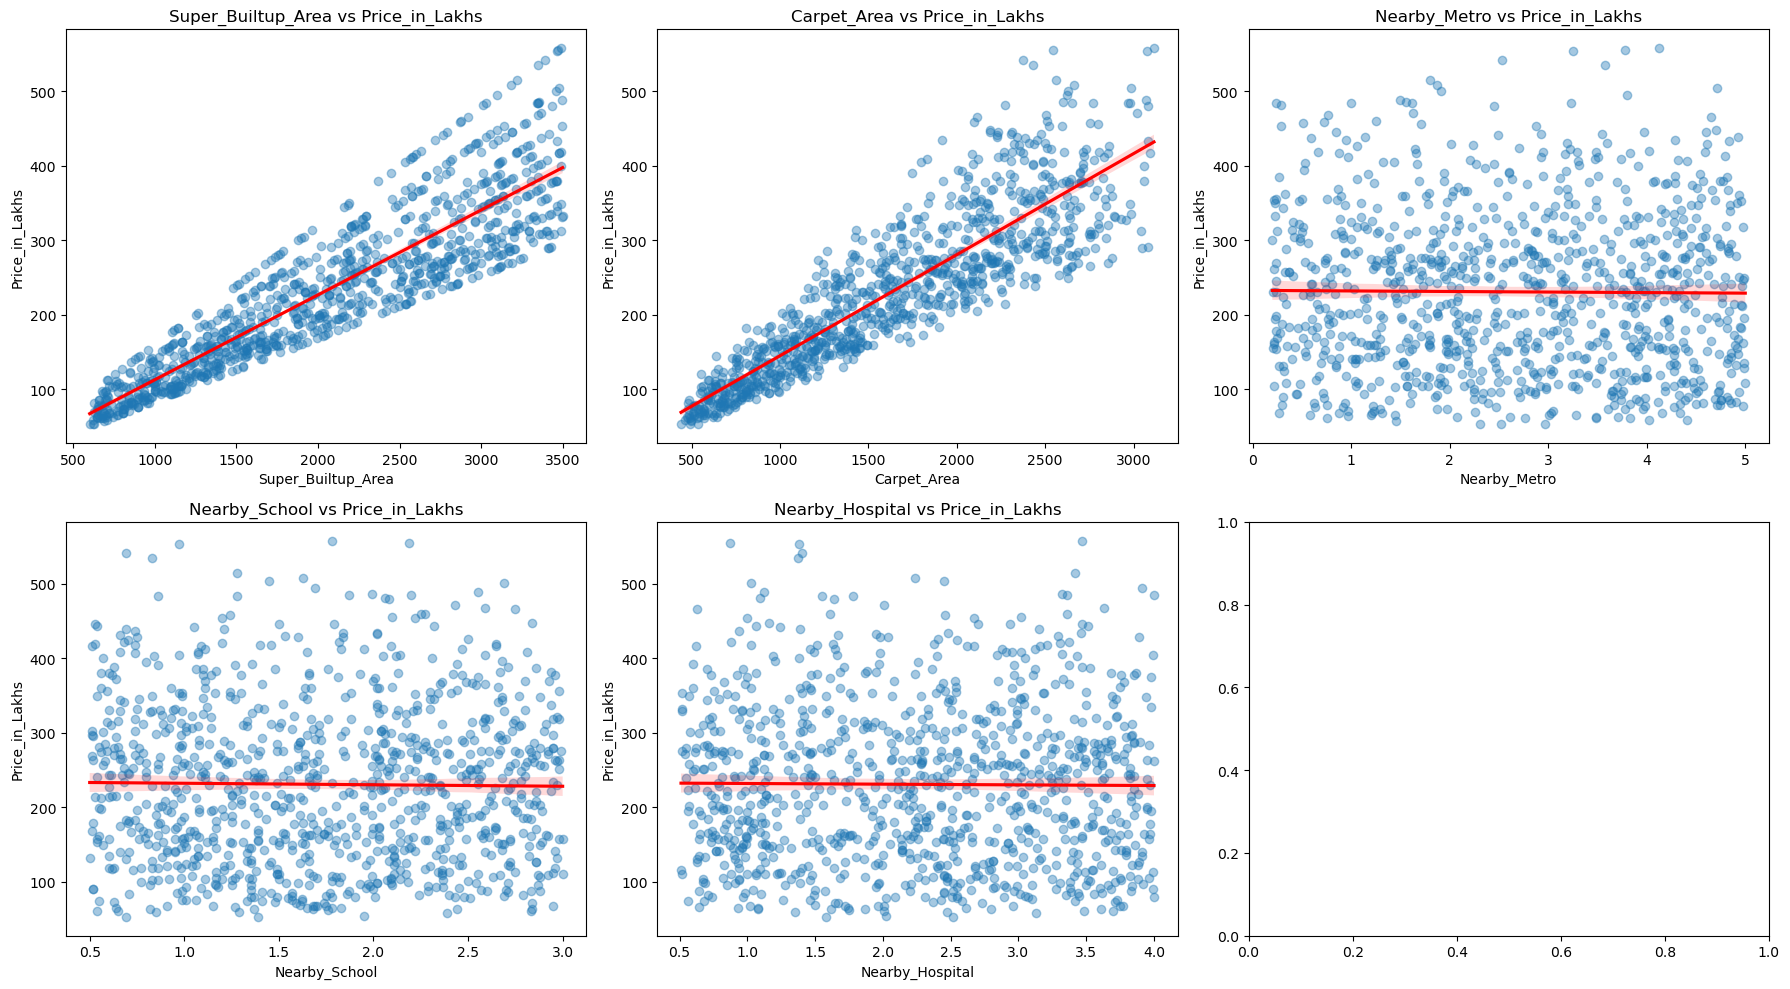

In [17]:
# We'll check linearity between actual Price and some important numerical features
# Let's pick a few key continuous features to analyze linearity with Price
important_features = ['Super_Builtup_Area', 'Carpet_Area', 'Nearby_Metro', 'Nearby_School', 'Nearby_Hospital']
target = 'Price_in_Lakhs'

# Plot regression lines for each of the selected features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.ravel()

for i, feature in enumerate(important_features):
    sns.regplot(x=df[feature], y=df[target], ax=axs[i], scatter_kws={'alpha': 0.4}, line_kws={"color": "red"})
    axs[i].set_title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_processed.drop('Price_in_Lakhs', axis=1)
y = df_processed['Price_in_Lakhs']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR(kernel='rbf')

# Train Models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)


SVR()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict with SVR
svr_preds = svr_model.predict(X_test)

# Evaluate SVR model
svr_r2 = r2_score(y_test, svr_preds)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_preds))

svr_r2, svr_rmse


(0.04004781801054336, 103.11356150986106)

In [20]:
# Predict with Linear Regression and Random Forest
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate both models
lr_r2 = r2_score(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

(lr_r2, lr_rmse), (rf_r2, rf_rmse)


((0.9714307122472581, 17.788555950945582),
 (0.9744870812470874, 16.81012955201582))

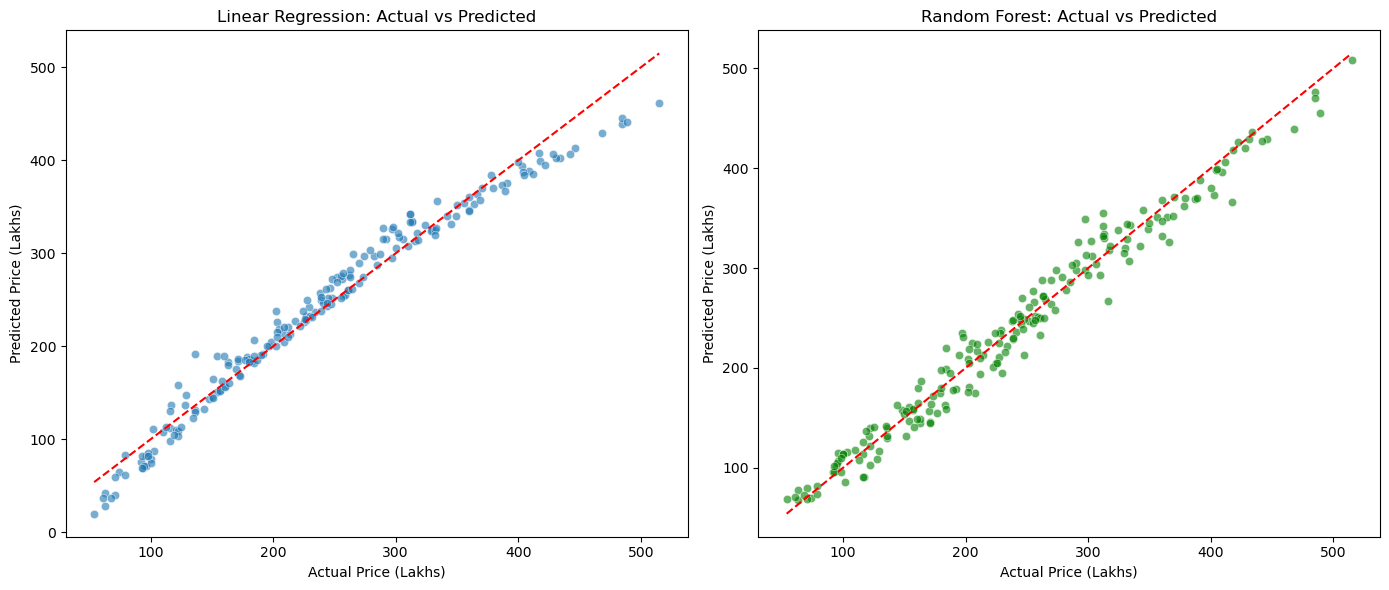

In [21]:
# Plot actual vs predicted prices for both models
plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')

# Random Forest Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')

plt.tight_layout()
plt.show()


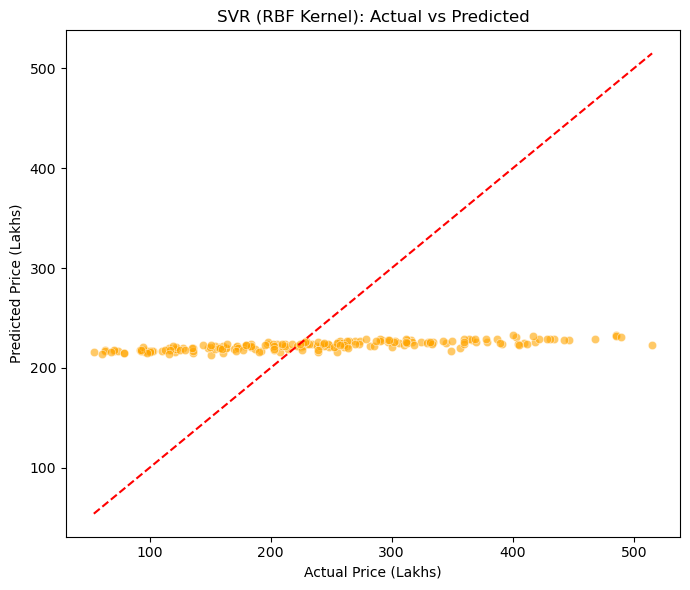

In [22]:
# Plot actual vs predicted prices for SVR model
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=svr_preds, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('SVR (RBF Kernel): Actual vs Predicted')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.tight_layout()
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/tmp/ipykernel_195/2060212032.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


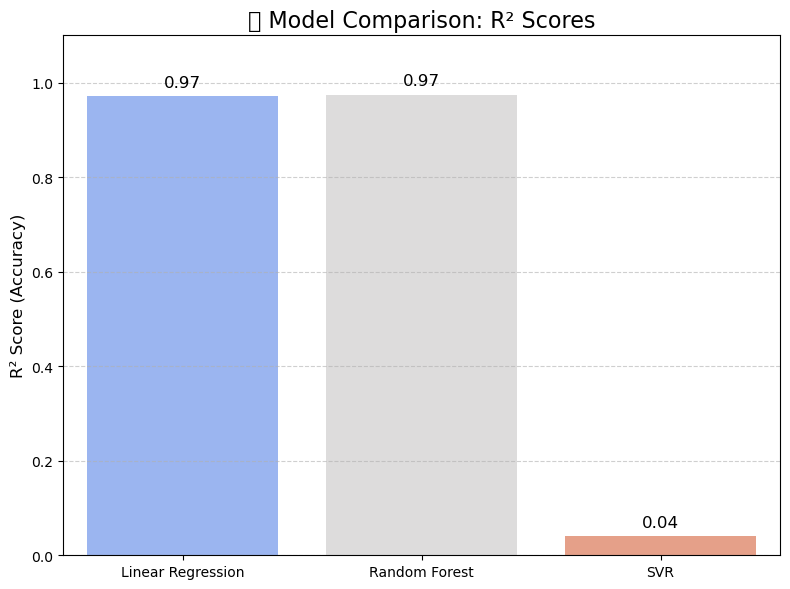

In [32]:
# Model names and their R² scores
model_names = ['Linear Regression', 'Random Forest', 'SVR']
r2_scores = [lr_r2, rf_r2, svr_r2]

# Plotting the R² score comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=r2_scores, palette='coolwarm')
plt.title('📊 Model Comparison: R² Scores', fontsize=16)
plt.ylabel('R² Score (Accuracy)', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display exact values on top of bars
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/tmp/ipykernel_195/3331447265.py:17: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


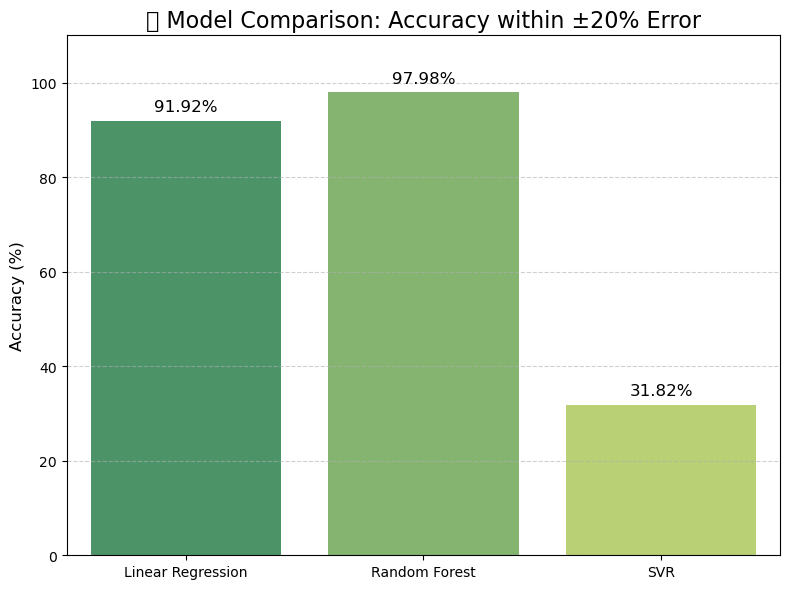

In [31]:
# Model names and their custom accuracy scores
model_names = ['Linear Regression', 'Random Forest', 'SVR']
accuracy_scores = [lr_accuracy, rf_accuracy, svr_accuracy]

# Plotting the custom accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='summer')
plt.title('✅ Model Comparison: Accuracy within ±20% Error', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show exact values on top of bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 2, f"{score:.2f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [33]:
# Pick another test sample for demonstration
sample = X_test.iloc[[1]]  # Pick a different index for variety
actual_price = y_test.iloc[1]

# Predict with all three models
lr_pred_price = lr_model.predict(sample)[0]
rf_pred_price = rf_model.predict(sample)[0]
svr_pred_price = svr_model.predict(sample)[0]

# Display actual and all predicted prices
actual_price, lr_pred_price, rf_pred_price, svr_pred_price


(282, 297.15570704179345, 277.71, 222.2485644492452)

/tmp/ipykernel_195/3727124155.py:20: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


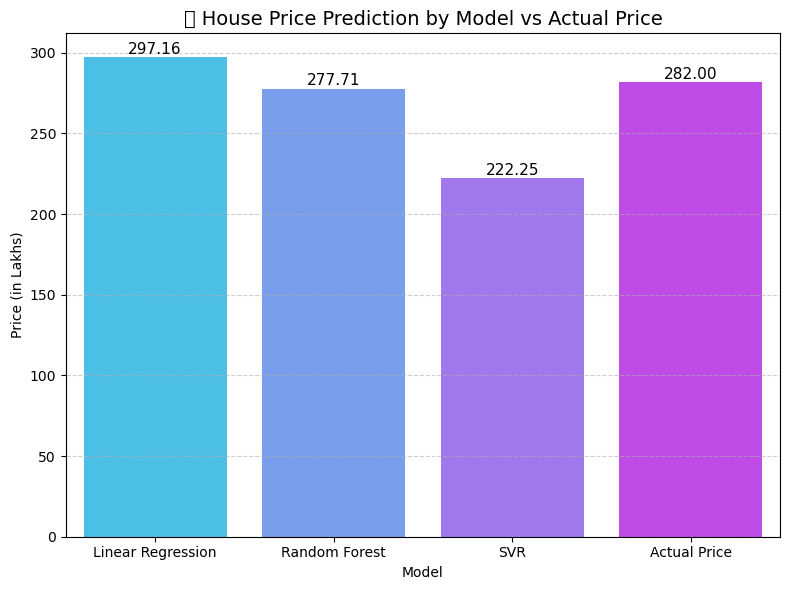

In [34]:
# Prepare data for visual representation of predictions
prediction_data = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'Actual Price'],
    'Price (Lakhs)': [lr_pred_price, rf_pred_price, svr_pred_price, actual_price]
}

prediction_df = pd.DataFrame(prediction_data)

# Plotting the predictions vs actual price
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Price (Lakhs)', data=prediction_df, palette='cool')
plt.title('🏡 House Price Prediction by Model vs Actual Price', fontsize=14)
plt.ylabel('Price (in Lakhs)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show values on top of bars
for i, price in enumerate(prediction_df['Price (Lakhs)']):
    plt.text(i, price + 2, f"{price:.2f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()


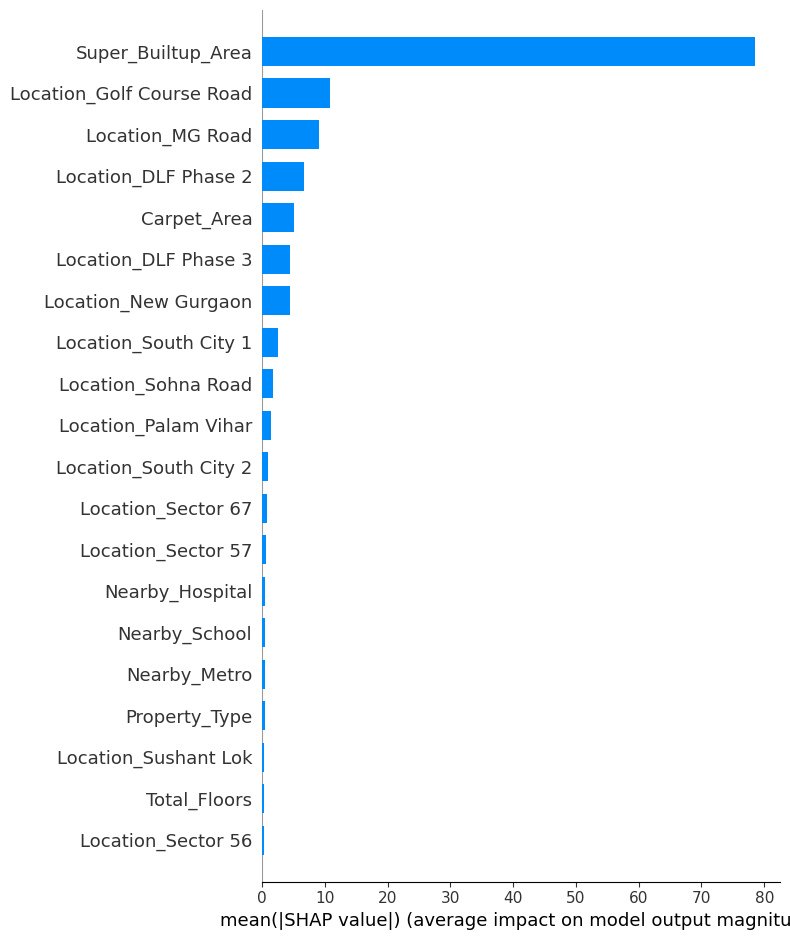

In [35]:
import shap

# Recreate TreeExplainer and compute SHAP values for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot feature importance using SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


  0%|          | 0/50 [00:00<?, ?it/s]

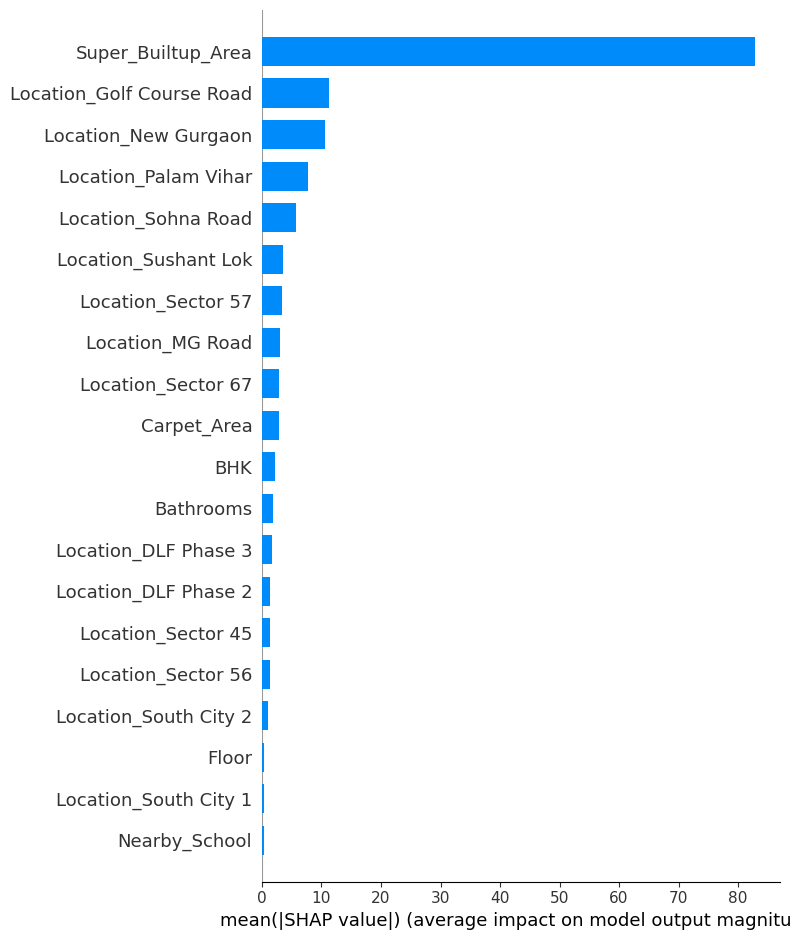

In [39]:
# Use SHAP's KernelExplainer for models like Linear Regression
from shap import KernelExplainer

# Select a small sample from training set for background data (required for KernelExplainer)
X_train_sample = X_train.sample(100, random_state=42)

# Create KernelExplainer for Linear Regression
kernel_explainer = shap.KernelExplainer(lr_model.predict, X_train_sample)

# Compute SHAP values for a small sample from the test set
shap_values_kernel = kernel_explainer.shap_values(X_test.iloc[:50], nsamples=100)

# Plot SHAP summary for Linear Regression (bar chart)
shap.summary_plot(shap_values_kernel, X_test.iloc[:50], plot_type="bar")


In [41]:
print("Thank You")

Thank You
